This is a notebook to recreate Figure 2 of Lamb, Taylor & Siemens 2023.  This figure shows the distribution of spectral characteristics of 234,000 realisations of an SMBHB population from [Rosado et al. 2015](https://academic.oup.com/mnras/article-abstract/451/3/2417/1184852)

In [1]:
%reload_ext autoreload
%autoreload 2
%config InlineBackend.figure_format ='retina'

import numpy as np
import matplotlib.pyplot as plt
import glob
from chainconsumer import ChainConsumer
import pickle
from ceffyl import Ceffyl, models
from enterprise.signals import parameter, gp_priors as gpp
from enterprise_extensions.model_utils import get_tspan

# ACCRE-specific import to load correct latex file
## COMMENT OUT AS REQUIRED
import os
os.environ["PATH"] += os.pathsep + '/home/lambwg/latex/bin/x86_64-linux' 

In [2]:
# setup default plotting code
plt.rcParams.update(plt.rcParamsDefault)
with open('/home/lambwg/ng15_rcparams.json', 'rb') as fin:
    plt.rcParams.update(json.load(fin))

# load the data set!

In [3]:
import pandas as pd

In [6]:
# data forwarded to us by Alberto Sesana
middir = '~/GFL/middleton21/data/A_gamma_alldata.out'
data = pd.read_csv(middir, delim_whitespace=True, usecols=[5,7], names=['log10_A', 'gamma'])

In [7]:
data

,log10_A,gamma
0,-15.1385,4.4461
1,-15.1653,4.4565
2,-15.0745,4.1196
3,-15.2166,4.8938
4,-14.9934,3.7030
...,...,...
233995,-14.6888,2.7786
233996,-15.2209,4.7974
233997,-15.3175,5.5419
233998,-15.2344,4.7274


100 randomly selected characteristics

In [8]:
#choice = np.random.randint(0, 234000, 100)
choice = np.array([ 42729, 195590,  81619,  85967, 228427,  70968, 215062,  76442,
                    76047,  88850, 229623, 154896, 206224,  68110, 111819,  22356,
                    134084, 217452,  55676,  21489, 205566,  93479, 185943,  16537,
                    23647,  69011, 169274, 128366, 158037, 192661, 172385, 168349,
                    219988,  35415,  77383, 147531,  46138, 232124,  29637,   4970,
                    129171, 125170, 106563, 190787,  36562, 108027,  38624,  45884,
                    208514,  84686,  96826, 204720,  26552,  15981,  36123,   5072,
                    183108, 164869, 110761, 169508, 223518,  43783,  36989, 198420,
                    133648,  38819, 210137, 219585, 110368, 139690, 142384,  70512,
                    204404, 218002, 110388,  38070, 146985, 130800,  62724,  61255,
                    53618, 170937,  73294,  46407, 159818,  54237, 105654,  80739,
                    160790,  12808,  69514, 226834, 122163, 121417, 157484, 151889,
                    117626, 118368, 175784, 180206])

# Make the plot!

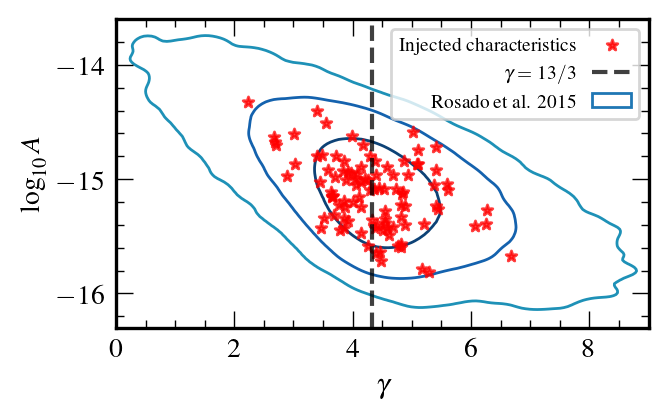

/tmp/ipykernel_1509/2145421051.py:27: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "rasterize" which is no longer supported as of 3.3 and will become an error in 3.6
  fig.savefig('../plots/rosado_dist.pdf',


In [19]:
fig, ax = plt.subplots(tight_layout=True)

p2 = ax.axvline(13/3, c='k', ls='--', alpha=0.75, label='$\gamma=13/3$')

c = ChainConsumer()
c.add_chain(data, name='Rosado et al. 2015')
c.configure(shade_alpha=0., sigmas=[1,2,3])
c.plotter.plot_contour(ax, 'gamma', 'log10_A');

p1 = ax.scatter(data.iloc[choice]['gamma'], data.iloc[choice]['log10_A'],
                marker='*', color='r', alpha=0.75, label='Injected characteristics')

ax.set_xlim((0,9))
ax.set_ylim((-16.3, -13.6)),
ax.set_xlabel('$\gamma$')
ax.set_ylabel('$\log_{10}A$')

import matplotlib.patches as mpatches
p3 = mpatches.Patch(facecolor='white', edgecolor='C0',
                    label='Rosado et al. 2015')

ax.legend(handles=[p1, p2, p3], markerfirst=False,
          frameon=True, edgecolor=None);

#fig.set_size_inches((5,5))
plt.show();
fig.savefig('../plots/rosado_dist.pdf',
            dpi=400, bbox_inches='tight',
            rasterize=True)